## Final Exam

In [361]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import scipy.stats as stats
import statsmodels. formula. api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from math import sqrt
from sklearn.metrics import mean_squared_error
df = pd.read_csv ('Lakshya+Soni.csv')

In [218]:
# defining some standard functions
def describe_stat (table_name,col_name):
    return (table_name[col_name].describe())
def standard_deviation (table_name,col_name):
    return np.std(table_name[col_name])
def variance (table_name,col_name):
    return np.var(table_name[col_name])
def mean (table_name,col_name):
    return np.mean(table_name[col_name])

**Q1) (a) The team becomes interested in the number of subjects that recharge across several days after plan expires. After an exploratory data analysis which includes drawing the observed histogram of the data, discuss a theoretical distribution that could be used to model such data.**

In [147]:
df_late_recharge = df [ df['avg_days_bw_rchg_and_expiry'] > 0]

In [148]:
describe_stat (df_late_recharge,'avg_days_bw_rchg_and_expiry')

count    473.000000
mean       1.905671
std        1.730303
min        0.000132
25%        0.557259
50%        1.458850
75%        2.720761
max       10.087773
Name: avg_days_bw_rchg_and_expiry, dtype: float64

<AxesSubplot:xlabel='avg_days_bw_rchg_and_expiry', ylabel='Count'>

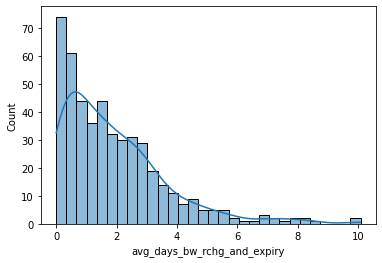

In [288]:
sns.histplot(data=df_late_recharge, x="avg_days_bw_rchg_and_expiry", bins=30, kde = True)

The theoretical distribution for the sample with 'avg_days_bw_rchg_and_expiry' greater than zero, the histogram seems to follow Exponential Distribution.

**Q1) (b) Find the point estimate and 95% confidence interval for the values of the parameters that provide the best fit to the observed data.**

In [166]:
print (f"Variance of the distribution is {variance(df_late_recharge, 'avg_days_bw_rchg_and_expiry')}")
print (f"Mean of the distribution is {mean(df_late_recharge, 'avg_days_bw_rchg_and_expiry')}")
N_1b = df_late_recharge['avg_days_bw_rchg_and_expiry'].count()
Confidence_1b=stats.expon.interval(0.95,loc=mean(df_late_recharge, 'avg_days_bw_rchg_and_expiry'),scale=standard_deviation(df_late_recharge, 'avg_days_bw_rchg_and_expiry')/np.sqrt(N_1b))
print (f"Confidence Interval for the mean is {Confidence_1b}")
describe_stat(df_late_recharge, 'avg_days_bw_rchg_and_expiry')

Variance of the distribution is 2.9876192771089856
Mean of the distribution is 1.905670743559139
Confidence Interval for the mean is (1.907682883388885, 2.198845463952018)


count    473.000000
mean       1.905671
std        1.730303
min        0.000132
25%        0.557259
50%        1.458850
75%        2.720761
max       10.087773
Name: avg_days_bw_rchg_and_expiry, dtype: float64

**Q1) (c) Is is customary in the industry to consider the top x percentile of the customers with delayed recharge as churners. Different companies may consider different values of x as they feel appropriate, based on the observed data and related inference. Therefore, typically, the value of x is chosen to be between 10 and 40. Suggest a value of x that the company should use to define the churners.**

In [13]:
df_recharge_delay = df [ df['recharge_delay'] > 0] # this describes how many days have passed since last recharge

Here while deriving the percentile i have considered only those who have recharge delay greater than zero, such that there are no one in the table who recharge on time.

In [290]:
describe_stat(df_recharge_delay,'recharge_delay')
# Following is the overview details of all the customers who have not recharged on time.

count    489.000000
mean       5.426429
std        4.601452
min        0.002917
25%        1.877312
50%        3.977748
75%        7.754481
max       24.703020
Name: recharge_delay, dtype: float64

In [295]:
df_recharge_delay_desc = df_recharge_delay.sort_values(by=['recharge_delay'], ascending=False)
df_recharge_delay_desc.head() # gives the details of top 5 customers who have not recharged on time.

,customer_id,ownership,activation_plan_code,mnp_flag,calls_incoming_cnt,calls_outgoing_cnt,calls_incoming_duration,calls_outgoing_duration,total_call_count,total_sum_duration,...,current_active_plan_validity,last_cycle_plan_mrp,last_cycle_plan_validity,avg_days_bw_rchg_and_expiry,stddev_days_bw_rchg_and_expiry,price_per_day,gb_per_day_quota,pcnt_quota_used,device_avg_asp,recharge_delay
754,10754,individual,9,1,6.0,67.0,6.963906,71.251195,73.0,78.215101,...,90,999,180,-3.971376,7.679336,3.333333,1.5,4.262020,less_10K,24.703020
837,10837,individual,9,0,2.0,9.0,2.459496,16.082412,11.0,18.541908,...,15,999,180,1.644881,7.495653,6.600000,0.5,16.057882,10K_to_20K,23.445544
921,10921,corporate,9,0,6.0,16.0,8.951579,25.596457,22.0,34.548035,...,90,500,120,0.114817,2.518581,3.333333,1.5,9.733570,50K_above,21.483032
433,10433,corporate,9,1,6.0,82.0,7.583596,131.583108,88.0,139.166704,...,90,128,28,2.009049,3.762413,3.333333,1.5,1.853996,20K_to_30K,18.496647
140,10140,corporate,9,0,114.0,34.0,125.649330,43.779123,148.0,169.428453,...,365,128,28,1.564667,4.412855,4.109589,3.0,1.339619,50K_above,18.467326


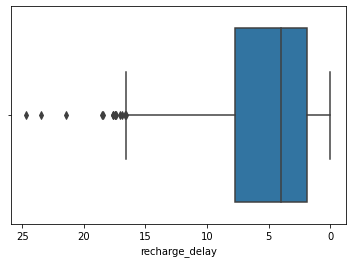

In [165]:
sns.boxplot(x="recharge_delay",data=df_recharge_delay_desc).invert_xaxis()
# Following is the box plot depicting the distribution of all those who have not recharged on time.
# It can be observed while looking at the box plot that there are certain number of outliers.

<AxesSubplot:xlabel='recharge_delay', ylabel='Count'>

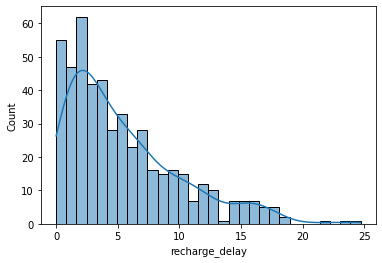

In [274]:
sns.histplot(data=df_recharge_delay, x="recharge_delay", bins=30, kde = True)
# The below histogram gives another perspective on how the sample is ditributed. 

Here, according to me a person having recharge delay of more than **13 days** is more likely to churn out.

## Question 2

**a) Customers who are not ready to forego their phone numbers (mnp_flag=1) recharge earlier than the rest.**

Null Hypothesis: Customers who are not ready to forego their phone numbers recharge at the same time as rest of the customers. \
Null Hypothesis: mean of flag 0 = mean of flag 1 \
Alternate Hypothesis: Customers who are not ready to forego their phone numbers recharge earlier than the rest of the customers. \
Alternate Hypothesis: mean of flag 0 > mean of flag 1


In [43]:
mnp_flag_0 = df [ df['mnp_flag'] == 0]
mnp_flag_1 = df [ df['mnp_flag'] == 1]

In [296]:
mnp_flag_0_var = variance(mnp_flag_0,'avg_days_bw_rchg_and_expiry') 
mnp_flag_1_var = variance(mnp_flag_1,'avg_days_bw_rchg_and_expiry')
mnp_flag_1_mean = mean(mnp_flag_1,'avg_days_bw_rchg_and_expiry')
mnp_flag_0_mean = mean(mnp_flag_0,'avg_days_bw_rchg_and_expiry')
N1 = mnp_flag_1['avg_days_bw_rchg_and_expiry'].count()
N0 = mnp_flag_0['avg_days_bw_rchg_and_expiry'].count()
alpha = 0.05
nu = N0+N1-2 # Degree of freedom

-0.05063578204599555 -0.10824119223730148


In [172]:
var_ratio = mnp_flag_0_var/mnp_flag_1_var
# since the var_ratio is less than 4, therefore the below formula can be applied directly
T_value_a = (mnp_flag_0_mean-mnp_flag_1_mean)/((mnp_flag_0_var/N0)+(mnp_flag_1_var/N1))**0.5
t = stats.t.ppf(1-alpha, nu)

<AxesSubplot:xlabel='mnp_flag', ylabel='avg_days_bw_rchg_and_expiry'>

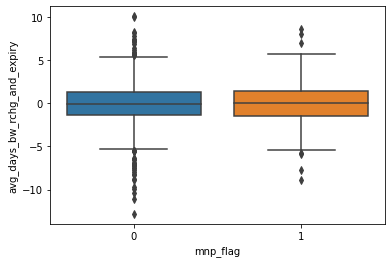

In [185]:
sns.boxplot(x="mnp_flag",y="avg_days_bw_rchg_and_expiry",data=df)

In [173]:
if T_value_a > t:
    print ('Null Hypothesis is rejected')
else:
    print ('Fail to reject Null Hypothesis')

Fail to reject Null Hypothesis


After conducting the Hypothesis Testing (two sample t-test) it is observed that the loyalty to the mobile number is not affecting the recharging pattern of a customer.

**Q-2) (b) Committed customers (customers with current plan validity more than last cycle plan validity) recharge earlier than the rest.**

Null Hypothesis: Committed customers recharge at the same time as rest of the customers. \
Null Hypothesis: mean of committed customers = mean of rest \
Alternate Hypothesis: Committed customers recharge earlier than the rest of the customers. \
Alternate Hypothesis: mean of rest > mean of committed customers 

In [109]:
committed_complement = df [ df['current_active_plan_validity'] < df['last_cycle_plan_validity']]
committed = df[df['current_active_plan_validity'] > df['last_cycle_plan_validity']]

In [174]:
committed_complement_var = variance(committed_complement,'avg_days_bw_rchg_and_expiry')
committed_var = variance(committed,'avg_days_bw_rchg_and_expiry')
committed_mean = mean(committed,'avg_days_bw_rchg_and_expiry')
committed_complement_mean = mean(committed_complement,'avg_days_bw_rchg_and_expiry')
N1_b = committed['avg_days_bw_rchg_and_expiry'].count()
N0_b = committed_complement['avg_days_bw_rchg_and_expiry'].count()
alpha = 0.05
nu = N0_b+N1_b-2 # Degree of freedom

In [175]:
var_ratio = committed_complement_var/committed_var
# since the var_ratio is less than 4, therefore the below formula can be applied directly
T_value_b = (committed_complement_mean-committed_mean)/((committed_complement_var/N0_b)+(committed_var/N1_b))**0.5
t = stats.t.ppf(1-alpha, nu)

In [176]:
if T_value_b > t:
    print ('Null Hypothesis is rejected')
else:
    print ('Fail to reject Null Hypothesis')

Fail to reject Null Hypothesis


After conducting the Hypothesis test (two sample t-test) it is observed that whether a customer is committed or not, generally does not affect his/her recharge behaiour.

**Q-2) (c) Customers who are not ready to forego their phone numbers (mnp_flag=1) show better engagement (tot_usage_mb and total_sum_duration).**

Null Hypothesis: Customers who are not ready to forego their phone numbers show same engagement as rest of the customers. \
Null Hypothesis: mean of flag 0 = mean of flag 1 \
Alternate Hypothesis: Customers who are not ready to forego their phone numbers show better engagement than the rest of the customers. \
Alternate Hypothesis: mean of flag 1 > mean of flag 0

In [178]:
tot_usage_mb_norm_1 = mnp_flag_1['tot_usage_mb']  / mnp_flag_1['tot_usage_mb'].abs().max() # normalized tot_usage_mb
total_sum_duration_norm_1 = mnp_flag_1['total_sum_duration']  / mnp_flag_1['total_sum_duration'].abs().max() # normalized total_sum_duration
engagement_1 = tot_usage_mb_norm_1 + total_sum_duration_norm_1
engagement_1.to_numpy()
tot_usage_mb_norm_0 = mnp_flag_0['tot_usage_mb']  / mnp_flag_0['tot_usage_mb'].abs().max() # normalized tot_usage_mb
total_sum_duration_norm_0 = mnp_flag_0['total_sum_duration']  / mnp_flag_0['total_sum_duration'].abs().max() # normalized total_sum_duration
engagement_0 = tot_usage_mb_norm_0 + total_sum_duration_norm_0
engagement_0.to_numpy()

array([0.39968554, 0.12520511, 0.1252431 , 0.7669365 , 0.51968915,
       0.20696281, 0.37815691, 0.22132202, 0.40133859, 0.09830007,
       0.53161892, 0.41541308, 0.21154141, 0.2511323 , 0.76794051,
       0.23695035, 0.19856843, 0.23375129, 0.38072357, 0.62248205,
       0.87815489, 0.12626722, 0.12246014, 0.25833069, 0.29673822,
       0.69458149, 0.51744397, 0.53699454, 0.07689721, 0.33808259,
       0.69152296, 0.40976894, 0.20123614, 0.12990073, 0.35652938,
       0.58392946, 0.43700748, 0.31119261, 0.33255287, 0.36756932,
       0.49201485, 0.28782034, 0.64179218, 0.43035825, 0.33992762,
       0.1277748 , 0.2543286 , 0.46710528, 0.32371737, 0.22572901,
       0.19675594, 0.1189638 , 0.47291445, 0.31428789, 0.33816354,
       0.19097559, 0.26328476, 0.34612346, 0.64749022, 0.29533142,
       0.24173468, 0.210356  , 0.70426483, 0.52154094, 0.51038906,
       0.5800533 , 0.5103522 , 0.35723249, 0.3883705 , 0.10928483,
       0.22207233, 0.38164403, 0.47644211, 0.3761163 , 0.66350

In [299]:
engagement_0_var = np.var(engagement_0)
engagement_1_var = np.var(engagement_1)
engagement_1_mean = np.mean(engagement_1)
engagement_0_mean = np.mean(engagement_0)
N1_c = engagement_1.count()
N0_c = engagement_0.count()
alpha = 0.05
nu = N0+N1-2 # Degree of freedom

In [300]:
var_ratio = committed_complement_var/committed_var
# since the var_ratio is less than 4, therefore the below formula can be applied directly
T_value_c = (engagement_1_mean-engagement_0_mean)/((engagement_0_var/N0_c)+(engagement_1_var/N1_c))**0.5
t = stats.t.ppf(1-alpha, nu)

In [301]:
if T_value_c > t:
    print ('Null Hypothesis is rejected')
else:
    print ('Fail to reject Null Hypothesis')

Null Hypothesis is rejected


After conducting the Hypothesis test (two sample t-test) it is observed that the customers who have come into UlweTel from other service providers after porting their numbers tend to use more mobile data.

**Q2) (d) Promotional schemes at the time of activation are assoicated with the engagement of the customers and thus their timely recharge or recharge delay.**

The column name mentioned for required data is not present

**Q2) (e) Customers with better experience recharge earlier than the rest.**

The question can be divided into two parts:\
**Part-1**\
Null Hypothesis: Customers with less percentage of dropped calls (lesser than the sample mean) recharge at the same time as rest.\
Null Hypothesis: mean of recharge time of less dropped calls = mean of recharge time of more dropped calls\
Alternate Hypothesis: Customers with less percentage of dropped calls recharge earlier than the rest.\
Alternate Hypothesis: mean of recharge time of more dropped calls > mean of recharge time of less dropped calls

In [319]:
good_implicit_experience = df [ df['pcnt_dropped_calls'] < df['pcnt_dropped_calls'].mean()]
worse_implicit_experience = df [ df['pcnt_dropped_calls'] > df['pcnt_dropped_calls'].mean()]

In [332]:
worse_implicit_experience_var = variance(worse_implicit_experience,'avg_days_bw_rchg_and_expiry')
good_implicit_experience_var = variance(good_implicit_experience,'avg_days_bw_rchg_and_expiry')
good_implicit_experience_mean = mean(good_implicit_experience,'avg_days_bw_rchg_and_expiry')
worse_implicit_experience_mean = mean(worse_implicit_experience,'avg_days_bw_rchg_and_expiry')
N1_e1 = good_implicit_experience['avg_days_bw_rchg_and_expiry'].count()
N0_e1 = worse_implicit_experience['avg_days_bw_rchg_and_expiry'].count()
alpha = 0.05
nu = N0_e1+N1_e1-2 # Degree of freedom

In [333]:
var_ratio = worse_implicit_experience_var/good_implicit_experience_var
# since the var_ratio is less than 4, therefore the below formula can be applied directly
T_value_e = (worse_implicit_experience_mean-good_implicit_experience_mean)/((worse_implicit_experience_var/N0_e1)+(good_implicit_experience_var/N1_e1))**0.5
t = stats.t.ppf(1-alpha, nu)

In [329]:
if T_value_c > t:
    print ('Null Hypothesis is rejected')
else:
    print ('Fail to reject Null Hypothesis')

Null Hypothesis is rejected


From the hypothesis test it can be concluded that the customers with less percentage of dropped calls recharge earlier than the rest

**Part-2**\
Null Hypothesis: Customers with less count of open queries/requests/complaints (lesser than the sample mean) recharge at the same time as rest.\
Null Hypothesis: mean of recharge time of less open queries = mean of recharge time of more open queries\
Alternate Hypothesis: Customers with less count of open queries/requests/complaints recharge earlier than the rest.\
Alternate Hypothesis: mean of recharge time of more open queries > mean of recharge time of less open queries

In [323]:
good_explicit_experience = df [ df['cnt_open_qrc'] < df['cnt_open_qrc'].mean()]
worse_explicit_experience = df [ df['cnt_open_qrc'] > df['cnt_open_qrc'].mean()]

In [331]:
worse_explicit_experience_var = variance(worse_explicit_experience,'avg_days_bw_rchg_and_expiry')
good_explicit_experience_var = variance(good_explicit_experience,'avg_days_bw_rchg_and_expiry')
good_explicit_experience_mean = mean(good_explicit_experience,'avg_days_bw_rchg_and_expiry')
worse_explicit_experience_mean = mean(worse_explicit_experience,'avg_days_bw_rchg_and_expiry')
N1_e2 = good_explicit_experience['avg_days_bw_rchg_and_expiry'].count()
N0_e2 = worse_explicit_experience['avg_days_bw_rchg_and_expiry'].count()
alpha = 0.05
nu = N0_e2+N1_e2-2 # Degree of freedom

In [334]:
var_ratio = worse_explicit_experience_var/good_explicit_experience_var
# since the var_ratio is less than 4, therefore the below formula can be applied directly
T_value_e = (worse_explicit_experience_mean-good_explicit_experience_mean)/((worse_explicit_experience_var/N0_e2)+(good_explicit_experience_var/N1_e2))**0.5
t = stats.t.ppf(1-alpha, nu)

In [335]:
if T_value_c > t:
    print ('Null Hypothesis is rejected')
else:
    print ('Fail to reject Null Hypothesis')

Null Hypothesis is rejected


From the hypothesis test it can be concluded that the Customers with less count of open queries/requests/complaints recharge earlier than the rest.

**Q2) (f) Customers who complain are associated with having poor implicit network experience.**

Null Hypothesis: There is no associaton between poor explicit experience and poor implicit network experience\
Alternate Hypothesis: Poor explicit experience and Poor implicit network experience are associated

In [343]:
# Defining table with customers having only poor explicit experience
poor_explicit_experience = df [ df ['cnt_open_qrc'] > (df ['cnt_open_qrc']).mean()]

In [344]:
# Definig all the test parameters which are related to network coverage
test_1=poor_explicit_experience['pcnt_dropped_calls']
test_2=poor_explicit_experience['rsrp_voice_pcnt_poor_duration']
test_3=poor_explicit_experience['rsrp_data_pcnt_poor_duration']
test_4=poor_explicit_experience['mean_cqi_voice_pcnt_poor_duration']
test_5=poor_explicit_experience['sinr_voice_pcnt_poor_duration']
test_6=poor_explicit_experience['sinr_data_pcnt_poor_duration']

In [347]:
#  Performing one way ANOVA test
stats_value,p_value=stats.f_oneway(test_1,test_2,test_3,test_4,test_5,test_6)
print('stats_value = ',stats_value,'     p_value = ',p_value)

stats_value =  253.77097806617826      p_value =  2.966964957378895e-220


In [346]:
if p_value < 0.05:
    print('Null Hypothesis is rejected')
else:
    print('Fail to reject Null Hypothesis')

Null Hypothesis is rejected


From the Hypothesis test (one way ANOVA test) it can be observed that Poor explicit experience and Poor implicit network experience are associated.

**Q3) (a) One of the main interests of the company is to predict the recharge delay of each customer, that is on which day before or after the plan expiration the customer will do their next recharge, based on historical data. Ghansoli Raja has asked you to deliver a report based on model for such predictive effort, given your acclaimed expertise on the field.**

In [351]:
df_co = df.copy() # Creating a copy of the dataframe
df_copy = df_co.dropna() # Eliminating entries with null values
df_rech_delay = df_copy.recharge_delay
# fetching all the columns on which the value may depend
X = df_copy[['activation_plan_code', 'mnp_flag', 'calls_incoming_cnt', 'calls_outgoing_cnt', 'calls_incoming_duration', 'calls_outgoing_duration', 'upload_usage_mb', 'download_usage_mb', 'days_since_latch', 'cnt_open_qrc', 'avg_days_to_close', 'cnt_call_drops', 'pcnt_dropped_calls', 'rsrp_voice_pcnt_poor_duration', 'rsrp_data_pcnt_poor_duration', 'mean_cqi_voice_pcnt_poor_duration', 'sinr_voice_pcnt_poor_duration', 'sinr_data_pcnt_poor_duration', 'age_on_network', 'cnt_connections', 'current_plan_code', 'cnt_recharges_made', 'total_payment_made', 'cnt_main_plans_taken', 'total_main_plans_mrp', 'cnt_addon_plans_taken', 'total_addon_plans_mrp', 'cnt_rchg_offline', 'cnt_rchg_online', 'cnt_rchg_on_or_before_expiry', 'cnt_rchg_after_expiry', 'current_active_plan_mrp', 'current_active_plan_validity', 'last_cycle_plan_mrp', 'last_cycle_plan_validity', 'avg_days_bw_rchg_and_expiry', 'stddev_days_bw_rchg_and_expiry', 'price_per_day', 'gb_per_day_quota', 'pcnt_quota_used']]
X_train,X_test,y_train,y_test=train_test_split(X ,df_rech_delay, test_size=0.2, random_state=1212)
# here test data is 20% and training data is 80%
scaler=MinMaxScaler()
X_train_sc=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_sc=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
regressor = LinearRegression()
print(regressor.fit(X_train_sc, y_train).intercept_)
print(regressor.fit(X_train_sc, y_train).coef_)

9.355643320689882
[ 3.85223262e+00 -1.01715574e-01 -2.36035998e+01 -1.97440295e+01
  8.11068570e-01  2.90736863e+00 -2.48074160e+00 -9.30843079e+00
  6.07763058e+00  3.43100368e+00 -1.89937198e-01  3.05111263e-01
  9.09462382e-01  7.28467278e-01  7.28467278e-01  3.38333057e+00
  1.91499220e+00  1.91499220e+00 -8.19163660e+00 -8.03466537e+00
  4.14943401e-02 -7.29824860e-01 -7.29824860e-01  2.36715895e-03
  2.36715895e-03 -1.05104772e+00 -1.05104772e+00  8.09006347e-01
 -2.29347593e+00 -6.31407003e-01 -2.46097185e-01  1.62916759e+01
 -1.55261688e+01  8.82581793e-01 -1.38721200e-01 -1.54689406e-01
  1.45401519e+01 -1.48421992e+00 -3.61737527e+00 -2.95407070e+01]


In [352]:
y_prediction = regressor.predict(X_test_sc)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

3.3676189483198717


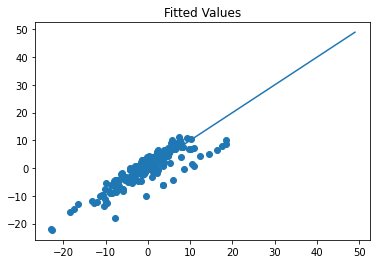

In [354]:
plt.scatter(y_test, regressor.predict(X_test_sc))
straight_line = np.arange(0, 50)
plt.plot(straight_line, straight_line)
plt.title("Fitted Values")
plt.show()

**Q3) (b) Redoing the analysis considering only some set of features from the original dataset.**

In [355]:
# fetching only selected columns on which the value may depend
X = df_copy[['calls_incoming_duration', 'calls_outgoing_duration', 'upload_usage_mb', 'download_usage_mb', 'days_since_latch', 'cnt_open_qrc', 'pcnt_dropped_calls', 'sinr_voice_pcnt_poor_duration', 'sinr_data_pcnt_poor_duration', 'age_on_network', 'cnt_connections', 'cnt_main_plans_taken', 'cnt_addon_plans_taken', 'cnt_rchg_on_or_before_expiry', 'cnt_rchg_after_expiry', 'current_active_plan_mrp', 'current_active_plan_validity', 'avg_days_bw_rchg_and_expiry']]
X_train,X_test,y_train,y_test = train_test_split(X, df_rech_delay, test_size=0.2, random_state=1212)
# here test data is 20% and training data is 80%
scaler=MinMaxScaler()
X_train_sc=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_sc=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
regressor = LinearRegression()
print(regressor.fit(X_train_sc, y_train).intercept_)
print(regressor.fit(X_train_sc, y_train).coef_)

12.209992391668296
[ -2.03342388   6.44103609  -3.07774446 -19.59733516 -21.38585934
   3.49971686   0.93187323   1.79519627   1.79519627 -65.5145788
  -8.6825038   23.40844062  20.89979964  17.91222538  19.24766271
  -1.64561524   1.7587904    0.34308519]


In [356]:
y_prediction = regressor.predict(X_test_sc)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

4.021823926903521


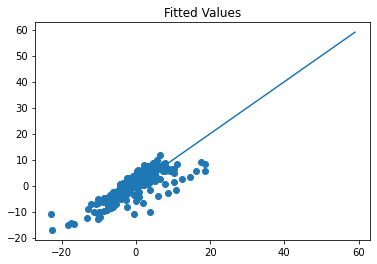

In [357]:
plt.scatter(y_test, regressor.predict(X_test_sc))
straight_line = np.arange(0, 60)
plt.plot(straight_line, straight_line)
plt.title("Fitted Values")
plt.show()

**After redoing the analysis it can be concluded that the value of the parameter (recharge delay) does not get affected much (as the value of root mean square error remains comparable in both parts 3(a) and 3(b) by a lot of parameter which we considered in our analysis in the first part, making those parameters redundant for our analysis.**

**Q4) (a) Build a model to identify the customers who are going to churn based on historical data.**

In [387]:
churn_value = 13 # As formulated earlier
df_copy['df_d'] = df_copy['recharge_delay']
df_copy['df_d'] = df_copy['df_d'].apply(lambda x: 1 if x >= churn_value else 0)
df_copy.info() # to get the overview of the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        977 non-null    int64  
 1   ownership                          977 non-null    object 
 2   activation_plan_code               977 non-null    int64  
 3   mnp_flag                           977 non-null    int64  
 4   calls_incoming_cnt                 977 non-null    float64
 5   calls_outgoing_cnt                 977 non-null    float64
 6   calls_incoming_duration            977 non-null    float64
 7   calls_outgoing_duration            977 non-null    float64
 8   total_call_count                   977 non-null    float64
 9   total_sum_duration                 977 non-null    float64
 10  tot_usage_mb                       977 non-null    float64
 11  upload_usage_mb                    977 non-null    float64

/var/folders/8w/gj9s1syx5tb49zt9k6gz5fw00000gn/T/ipykernel_2234/529878008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['df_d'] = df_copy['recharge_delay']
/var/folders/8w/gj9s1syx5tb49zt9k6gz5fw00000gn/T/ipykernel_2234/529878008.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['df_d'] = df_copy['df_d'].apply(lambda x: 1 if x >= churn_value else 0)


In [384]:
X = df_copy[['customer_id', 'activation_plan_code', 'mnp_flag', 'calls_incoming_cnt', 'calls_outgoing_cnt', 'calls_incoming_duration', 'calls_outgoing_duration', 'total_call_count', 'total_sum_duration', 'tot_usage_mb', 'upload_usage_mb', 'download_usage_mb', 'days_since_latch', 'cnt_open_qrc', 'avg_days_to_close', 'cnt_call_drops', 'pcnt_dropped_calls', 'rsrp_voice_pcnt_poor_duration', 'rsrp_data_pcnt_poor_duration', 'mean_cqi_voice_pcnt_poor_duration', 'sinr_voice_pcnt_poor_duration', 'sinr_data_pcnt_poor_duration', 'age_on_network', 'cnt_connections', 'current_plan_code', 'cnt_recharges_made', 'total_payment_made', 'cnt_main_plans_taken', 'total_main_plans_mrp', 'cnt_addon_plans_taken', 'total_addon_plans_mrp', 'cnt_rchg_offline', 'cnt_rchg_online', 'cnt_rchg_on_or_before_expiry', 'cnt_rchg_after_expiry', 'current_active_plan_mrp', 'current_active_plan_validity', 'last_cycle_plan_mrp', 'last_cycle_plan_validity', 'avg_days_bw_rchg_and_expiry', 'stddev_days_bw_rchg_and_expiry', 'price_per_day', 'gb_per_day_quota', 'pcnt_quota_used']]
X = sm.add_constant(X)
Y = df_copy['df_d']

In [388]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size = 0.80, random_state =1212)

In [389]:
scaler = StandardScaler()
train_scaled_columns  = scaler.fit_transform(train_X)
log_reg = sm.Logit(train_Y, train_X).fit()
print(log_reg.summary())

         Current function value: 0.088133
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   df_d   No. Observations:                  781
Model:                          Logit   Df Residuals:                      740
Method:                           MLE   Df Model:                           40
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                  0.4847
Time:                        23:46:19   Log-Likelihood:                -68.832
converged:                      False   LL-Null:                       -133.57
Covariance Type:            nonrobust   LLR p-value:                 2.283e-11
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.1449     10.986      0.013      0.989     -21.388      21.

/Users/lakshyasoni/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Q4) (b) Build a model to identify the customers who are going to churn based on historical data with important predictors only.**

In [390]:
X = df_copy[['customer_id', 'activation_plan_code', 'mnp_flag', 'calls_incoming_duration', 'calls_outgoing_duration', 'upload_usage_mb', 'download_usage_mb', 'days_since_latch', 'cnt_open_qrc', 'pcnt_dropped_calls', 'rsrp_voice_pcnt_poor_duration', 'rsrp_data_pcnt_poor_duration', 'mean_cqi_voice_pcnt_poor_duration', 'sinr_voice_pcnt_poor_duration', 'sinr_data_pcnt_poor_duration', 'age_on_network', 'cnt_connections', 'current_plan_code', 'cnt_recharges_made', 'total_payment_made', 'cnt_main_plans_taken', 'total_main_plans_mrp', 'cnt_rchg_on_or_before_expiry', 'cnt_rchg_after_expiry', 'current_active_plan_validity', 'avg_days_bw_rchg_and_expiry', 'pcnt_quota_used']]
X = sm.add_constant(X)
Y = df_copy['df_d']

In [391]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size = 0.80, random_state =1212)

In [392]:
scaler = StandardScaler()
train_scaled_columns  = scaler.fit_transform(train_X)
log_reg = sm.Logit(train_Y, train_X).fit()
print(log_reg.summary())

         Current function value: 0.106569
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   df_d   No. Observations:                  781
Model:                          Logit   Df Residuals:                      753
Method:                           MLE   Df Model:                           27
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                  0.3769
Time:                        23:52:50   Log-Likelihood:                -83.230
converged:                      False   LL-Null:                       -133.57
Covariance Type:            nonrobust   LLR p-value:                 1.990e-10
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               -10.8811      8.606     -1.264      0.206     -27.748       5.

/Users/lakshyasoni/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
